<a href="https://colab.research.google.com/github/ML-Bioinfo-CEITEC/T3SE/blob/main/models/lightgbm/T3SE_Cterm_1st_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import lightgbm as lgb # gradient-boosting tree classification

## Data preparation

In [2]:
df = pd.read_csv('/content/T3SE_clustered_embeddings_Cterm_train.csv')

df

,ID,Label,Sequence_part,f0,f1,f2,f3,f4,f5,f6,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,WP_047339834.1,0,ANEDVALPYVKTPVEFGRVGRLTLD,0.000407,0.000005,0.001047,0.000030,-0.000163,-0.000393,-0.000163,...,0.001082,-0.000664,0.000011,-0.000718,0.003047,-0.000583,-0.000202,-0.000225,0.000102,0.000567
1,WP_147480133.1,0,NGPGVARHWNALIRELERSGTDYRD,0.000053,-0.000530,0.000284,0.000886,0.000633,-0.000789,-0.000383,...,0.000103,-0.001047,-0.000300,0.000636,0.000849,-0.000596,0.000249,-0.001266,-0.000604,-0.000326
2,WP_005744181.1,0,QAPIKPLPFGLGMLPVDKQSAGTQP,0.000123,-0.000468,-0.000129,0.001192,-0.000428,-0.000322,-0.000250,...,0.000003,0.001135,-0.000647,0.000007,0.001336,-0.000664,-0.001059,0.000033,-0.000634,0.001132
3,WP_139473748.1,0,EVLYHPLFDELPDELPDAQAEESYL,0.000477,-0.000917,0.000431,-0.000966,-0.000232,-0.000422,-0.000140,...,0.000620,-0.000204,0.000262,-0.000112,0.001726,-0.000623,-0.001307,0.000018,-0.000033,-0.000381
4,WP_234896833.1,0,IFLCCRMGFSRSGSMRISSVGKSAM,0.000750,-0.001539,-0.000485,0.000132,-0.000757,-0.000585,-0.000025,...,0.000742,-0.000898,-0.000476,-0.000335,0.001818,-0.000384,-0.000291,-0.000965,0.000671,0.000320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008,WP_040148532.1,0,SDSRGALLVADDVGNVIWRVTPKAR,0.001590,0.000266,0.000263,-0.000243,-0.000851,-0.001579,-0.000003,...,0.000319,0.000221,-0.000082,-0.000131,0.000374,-0.000032,0.000379,-0.000408,-0.000615,-0.000069
3009,WP_043882701.1,0,MFFVLLFFYSKNEATKPLPTRVTYK,0.000845,-0.000933,0.001072,0.000317,0.000246,-0.000739,-0.000877,...,0.001243,-0.000794,-0.000074,-0.002397,0.004000,0.000184,-0.001672,-0.001130,-0.002311,0.000881
3010,WP_028133307.1,0,DYEEISRDRKAGAQATVLLVQGFAG,0.000941,-0.000252,0.001584,-0.000241,-0.000186,-0.000742,-0.000718,...,0.000637,-0.000723,0.000472,0.000177,0.002906,-0.000278,0.000311,-0.000531,0.000586,0.000505
3011,WP_244625383.1,0,LGVSSSSVKQYLTRANRQCLFAVSA,0.001204,-0.000121,0.001055,-0.000520,-0.001009,-0.000404,-0.000139,...,0.000361,-0.000223,0.000438,0.000324,0.002702,-0.000863,-0.000517,-0.000672,-0.000294,0.000529


In [3]:
df.drop(columns=['ID', 'Sequence_part'], inplace=True)
df['Label'].value_counts()

0    2784
1     229
Name: Label, dtype: int64

In [4]:
X_train = df.iloc[:,1:]
y_train = df['Label']

## Model training

In [5]:
clf = lgb.LGBMClassifier(objective="binary", seed=123)
clf.fit(X_train, y_train)

LGBMClassifier(objective='binary', seed=123)

## Model evaluation

In [6]:
df2 = pd.read_csv('/content/T3SE_clustered_embeddings_Cterm_test.csv').drop(columns=['ID', 'Sequence_part'])
df2

,Label,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1014,f1015,f1016,f1017,f1018,f1019,f1020,f1021,f1022,f1023
0,0,-0.000344,-0.000402,0.000336,0.000421,0.000151,-0.000768,-0.000814,-0.000788,-0.000546,...,0.000493,-0.000012,0.000239,-0.000903,0.002389,-0.000990,-0.000406,0.000062,-0.000458,0.000875
1,0,0.001638,-0.000620,0.000219,-0.000067,-0.001385,-0.000131,-0.001058,0.001141,0.000868,...,-0.000769,-0.000223,-0.000683,-0.000031,0.002428,-0.000556,0.000675,-0.001688,-0.000128,0.000397
2,1,-0.000097,-0.001043,-0.000350,-0.001486,0.000180,-0.001216,0.001129,-0.000178,0.002931,...,0.003558,-0.001795,0.000300,0.000523,0.000677,-0.001501,-0.001410,-0.000713,0.000819,-0.000486
3,0,0.000925,-0.000978,0.000469,0.000516,-0.000450,-0.000391,-0.000379,0.000005,0.000181,...,0.000010,-0.000656,-0.000712,0.000680,0.001155,-0.000894,0.000702,-0.001363,-0.000357,-0.000101
4,0,0.001157,0.000595,0.000768,-0.000945,-0.000823,-0.000276,-0.000339,-0.000156,-0.000104,...,0.000225,-0.000461,-0.001618,0.000025,0.001177,-0.001089,-0.000128,-0.000141,0.000241,-0.000234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,0,-0.000601,-0.000967,0.000629,0.000887,0.000891,-0.001494,0.000956,-0.001313,0.000943,...,0.001322,-0.000932,-0.000185,0.001502,0.002228,-0.001596,-0.001111,0.000333,-0.000012,0.000140
750,0,0.001038,-0.001790,0.001552,-0.001653,-0.000876,-0.000231,-0.000832,-0.000385,0.000749,...,0.000332,0.000078,-0.000768,-0.001021,0.001404,-0.000491,-0.000646,0.000362,-0.000110,0.001267
751,0,-0.001010,-0.000167,0.000250,0.000809,0.001101,-0.000864,-0.000654,-0.000245,-0.000879,...,0.000506,-0.000025,-0.000118,0.000358,0.001976,0.000026,0.000724,0.000048,-0.000735,0.000488
752,0,-0.002443,-0.002574,0.000157,0.000626,0.000863,-0.001198,-0.002479,-0.000809,-0.000617,...,0.003371,0.001405,-0.001044,-0.000263,0.002654,0.000823,0.000588,0.000231,-0.000569,0.000052


In [7]:
X_test = df2.iloc[:,1:]
y_test = df2['Label']

y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score

# Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC:", auc)

Test Accuracy: 0.8992042440318302
F1 Score: 0.0
AUC: 0.6923907707412862


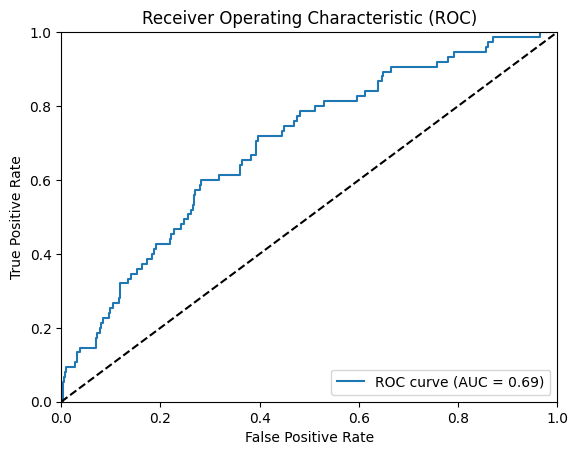

In [9]:
# Compute the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

AUPRC Score: 0.209950735335947


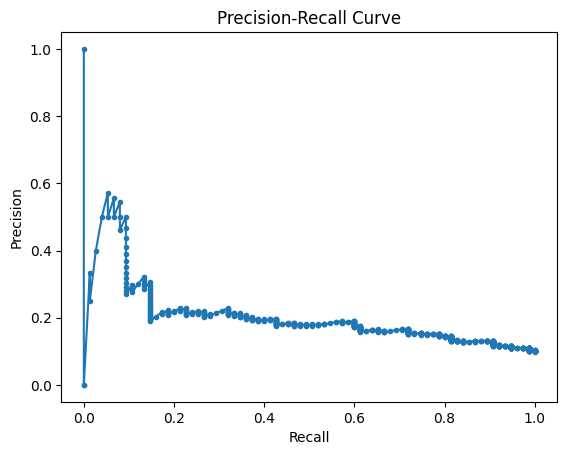

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision and recall values
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate AUPRC score
auprc_score = average_precision_score(y_test, y_pred_proba)
print("AUPRC Score:", auprc_score)

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

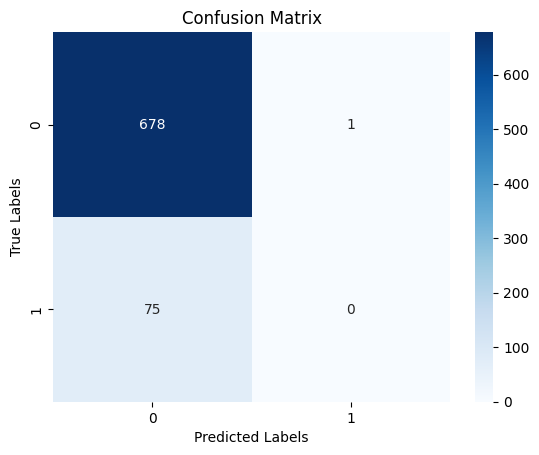

In [10]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and axis ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()